#PREDICATING SALES USING STATISTICAL LEARNING APPROACH
linear regression and use of stats models and sklearn to build regression model and evaluate it


    What is linear regression?
    Analyzing Advertisement dataset.
    Building a simple linear regression model & multiple linear regression model.
    Understanding OLS methods to estimate model parameters.
    How to use statsmodel API in python?
    Interpreting the coefficients of the model.
    How to find if the parameters estimated are significant?
    Making predictions using the model.
    Finding model residuals and analyzing it.
    Evaluating model efficiency using RMSE and R-Square values.
    Understanding gradient descent approach to find model parameters.
    Splitting dataseta and cross validating models.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as smf
from sklearn.cross_validation import train_test_split
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
%matplotlib inline

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
sales_df = pd.read_csv( "DATA_EXL/BSP.csv",parse_dates=[2])

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204547 entries, 0 to 204546
Data columns (total 15 columns):
RETAIL_OUTLET_NUMBER         204547 non-null int64
BASE_PRODUCT_NUMBER          204547 non-null int64
CALENDAR_DATE                204547 non-null datetime64[ns]
EXPECTED_DAILY_SALES_QTY     204547 non-null float64
REDUCED_SALES_SINGLES_QTY    204547 non-null int64
EXPECTED_SOD_SOH_QTY         204547 non-null float64
ADJUSTED_SALES_SINGLES       204547 non-null float64
UNUSE_INDICATOR              204547 non-null object
STEP_INDICATOR               204547 non-null object
ACTUAL_SALES_SINGLES         204547 non-null int64
SHDW_EXPECTED_DAILY_SALES    8230 non-null float64
WTHR_EXPECTED_DAILY_SALES    8230 non-null float64
WTHR_FACTOR                  204547 non-null float64
Product_Sub_Group_Code       204547 non-null object
Long_Description             204547 non-null object
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 23.4+ MB


In [5]:
sales_df_15 = sales_df[sales_df['CALENDAR_DATE']<'2015-12-31']
sales_df_15_pn = sales_df_15[(sales_df['STEP_INDICATOR']=='P')|(sales_df['STEP_INDICATOR']=='N')]

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [6]:
sales_df_15_pn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30900 entries, 0 to 47744
Data columns (total 15 columns):
RETAIL_OUTLET_NUMBER         30900 non-null int64
BASE_PRODUCT_NUMBER          30900 non-null int64
CALENDAR_DATE                30900 non-null datetime64[ns]
EXPECTED_DAILY_SALES_QTY     30900 non-null float64
REDUCED_SALES_SINGLES_QTY    30900 non-null int64
EXPECTED_SOD_SOH_QTY         30900 non-null float64
ADJUSTED_SALES_SINGLES       30900 non-null float64
UNUSE_INDICATOR              30900 non-null object
STEP_INDICATOR               30900 non-null object
ACTUAL_SALES_SINGLES         30900 non-null int64
SHDW_EXPECTED_DAILY_SALES    1903 non-null float64
WTHR_EXPECTED_DAILY_SALES    1903 non-null float64
WTHR_FACTOR                  30900 non-null float64
Product_Sub_Group_Code       30900 non-null object
Long_Description             30900 non-null object
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 3.8+ MB


#DF = sales_df_15_pn[sales_df_15_pn['STEP_INDICATOR']=='P']
#DF.count()

In [7]:
sales_df_15_pn.head(5)

,RETAIL_OUTLET_NUMBER,BASE_PRODUCT_NUMBER,CALENDAR_DATE,EXPECTED_DAILY_SALES_QTY,REDUCED_SALES_SINGLES_QTY,EXPECTED_SOD_SOH_QTY,ADJUSTED_SALES_SINGLES,UNUSE_INDICATOR,STEP_INDICATOR,ACTUAL_SALES_SINGLES,SHDW_EXPECTED_DAILY_SALES,WTHR_EXPECTED_DAILY_SALES,WTHR_FACTOR,Product_Sub_Group_Code,Long_Description
0,3101,66523006,2015-10-09,22.34,1,17.55,19.15,N,P,19,NaN,NaN,1.010632,F42AC,TESCO BRITISH CHICKEN BREAST PORTIONS 769G
1,3101,59143118,2015-06-09,0.86,0,3.23,2.00,N,N,2,NaN,NaN,0.939946,F42AD,T.FIN BRT C/FED F/RANGE THIGH & DRUMSTICKS 1KG
2,3101,54221952,2015-05-09,7.10,0,13.83,3.00,N,N,3,NaN,NaN,1.015082,F42AC,T. BRT CKN BREAST QUARTERS 240G-350G
3,3101,72693912,2015-06-09,3.94,0,8.79,6.00,N,P,6,NaN,NaN,0.920289,F42AA,T. ROAST IN BAG WHOLE CHICKEN PSO STFD 1.5KG
4,2889,77312297,2015-06-09,4.48,0,7.13,6.18,N,N,6,NaN,NaN,0.948995,F42AA,T. ROAST IN BAG READY BST WHOLE CHICKEN 1.5KG


In [8]:
#Remove the index column
slSales_df = sales_df_15_pn[["RETAIL_OUTLET_NUMBER", "Product_Sub_Group_Code", "CALENDAR_DATE", "ADJUSTED_SALES_SINGLES","STEP_INDICATOR","WTHR_FACTOR","REDUCED_SALES_SINGLES_QTY"]]

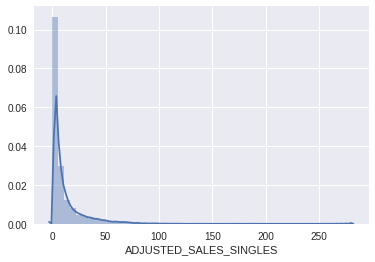

In [9]:
#Exploring Data
#Distribution of Variables

sns.distplot(slSales_df.ADJUSTED_SALES_SINGLES, hist=True)

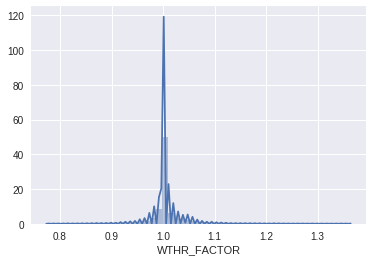

In [10]:
sns.distplot(slSales_df.WTHR_FACTOR, hist=True)

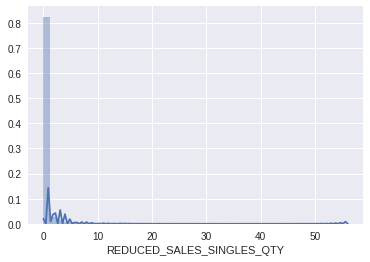

In [11]:
sns.distplot(slSales_df.REDUCED_SALES_SINGLES_QTY, hist=True)

In [12]:

#Is there a relationship between sales and spend various fields?

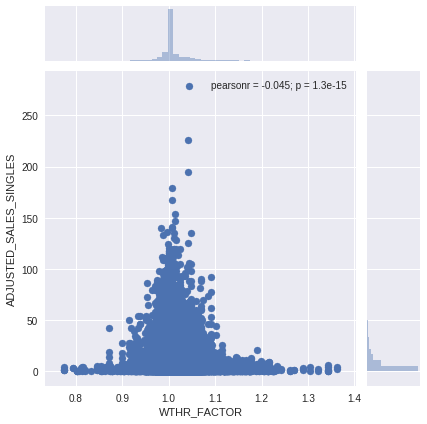

In [13]:
sns.jointplot(slSales_df.WTHR_FACTOR,slSales_df.ADJUSTED_SALES_SINGLES)

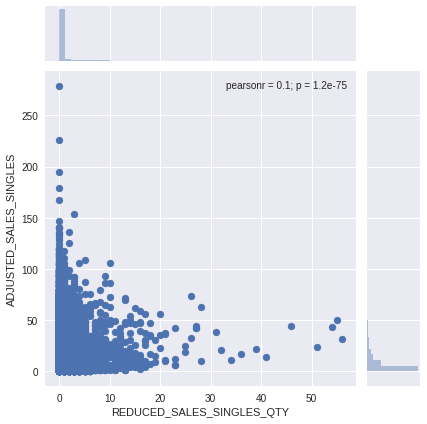

In [16]:
sns.jointplot(slSales_df.REDUCED_SALES_SINGLES_QTY,slSales_df.ADJUSTED_SALES_SINGLES)

In [17]:
# BOTH THE ABOVE FACTORS APPEAR TO BE CORELLATED

In [19]:
slSales_df.Product_Sub_Group_Code.unique()

array(['F42AC', 'F42AD', 'F42AA', 'F42AH', 'F42AJ', 'F42AL', 'F42AG'], dtype=object)

In [20]:
X_features = [
 'STEP_INDICATOR',
 'WTHR_FACTOR',
 'REDUCED_SALES_SINGLES_QTY',
 'Product_Sub_Group_Code',
  'ADJUSTED_SALES_SINGLES']

In [21]:
slSales_df2 = pd.get_dummies( slSales_df[X_features], drop_first = True )

In [22]:
slSales_df2.head(5)

,WTHR_FACTOR,REDUCED_SALES_SINGLES_QTY,ADJUSTED_SALES_SINGLES,STEP_INDICATOR_P,Product_Sub_Group_Code_F42AC,Product_Sub_Group_Code_F42AD,Product_Sub_Group_Code_F42AG,Product_Sub_Group_Code_F42AH,Product_Sub_Group_Code_F42AJ,Product_Sub_Group_Code_F42AL
0,1.010632,1,19.15,1,1,0,0,0,0,0
1,0.939946,0,2.00,0,0,1,0,0,0,0
2,1.015082,0,3.00,0,1,0,0,0,0,0
3,0.920289,0,6.00,1,0,0,0,0,0,0
4,0.948995,0,6.18,0,0,0,0,0,0,0


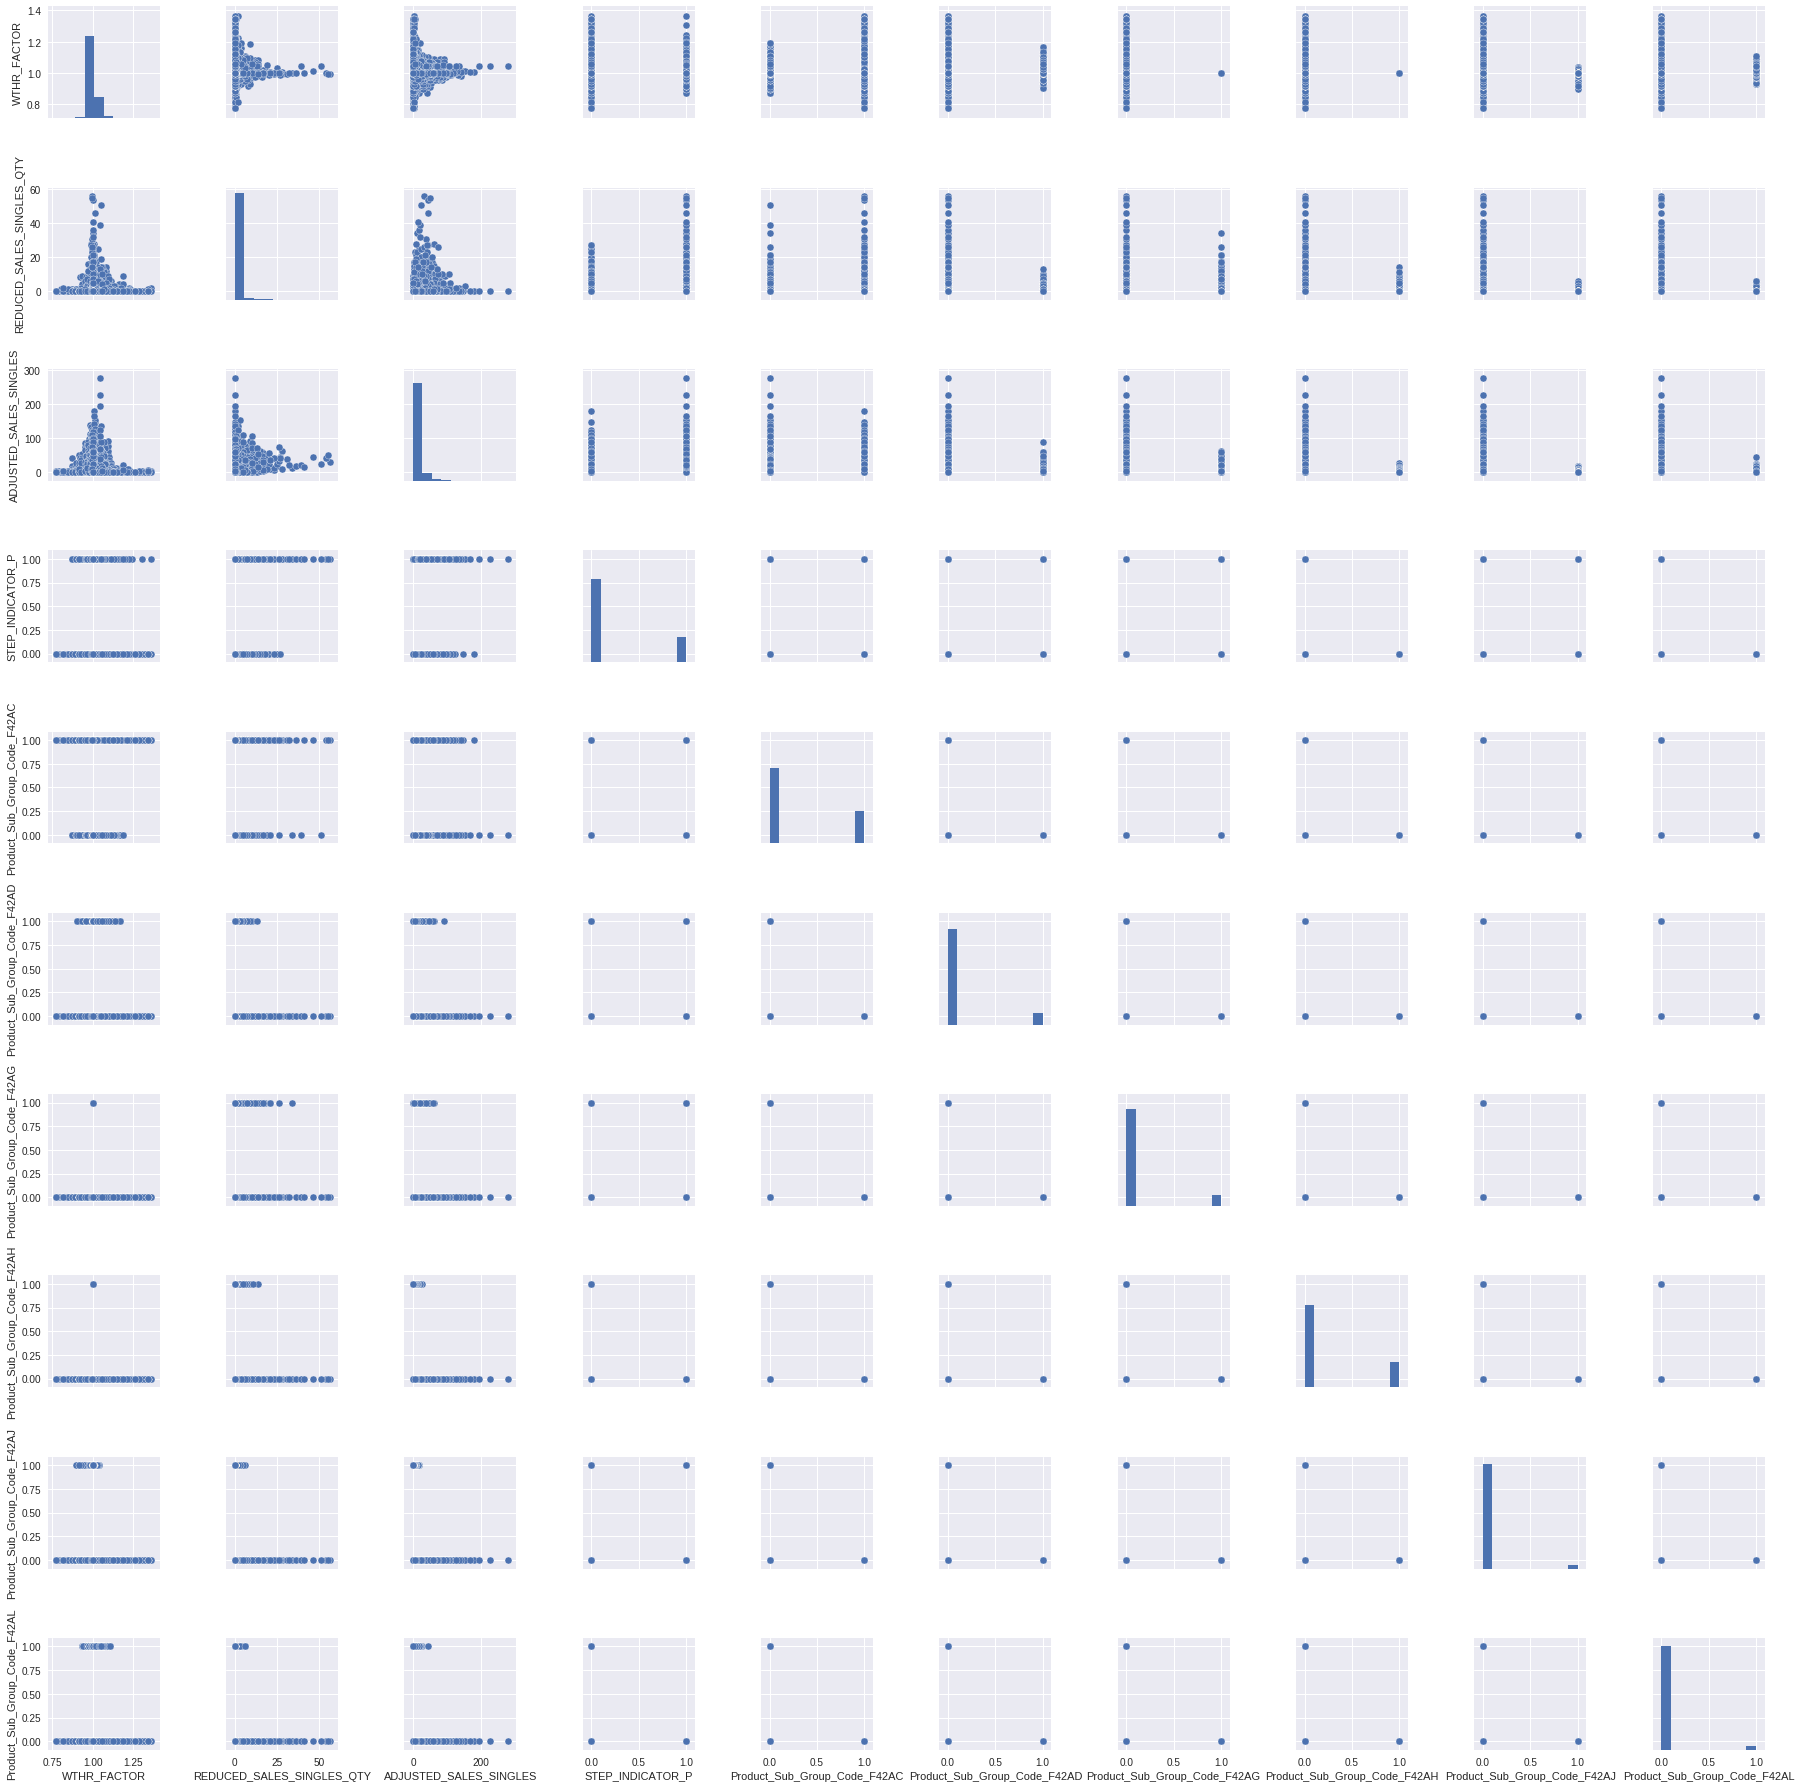

In [23]:
sns.pairplot( slSales_df2 )

In [24]:
slSales_df2.corr()
#there is no high corellation between factors
#we would have to remove fields that had high corellation

,WTHR_FACTOR,REDUCED_SALES_SINGLES_QTY,ADJUSTED_SALES_SINGLES,STEP_INDICATOR_P,Product_Sub_Group_Code_F42AC,Product_Sub_Group_Code_F42AD,Product_Sub_Group_Code_F42AG,Product_Sub_Group_Code_F42AH,Product_Sub_Group_Code_F42AJ,Product_Sub_Group_Code_F42AL
WTHR_FACTOR,1.000000,-0.010472,-0.045443,-0.008852,-0.001977,0.074702,-0.078121,-0.127395,-0.061576,0.035393
REDUCED_SALES_SINGLES_QTY,-0.010472,1.000000,0.104408,0.127120,0.062762,-0.033032,0.089721,-0.060093,-0.034348,-0.022483
ADJUSTED_SALES_SINGLES,-0.045443,0.104408,1.000000,0.396709,0.367479,-0.104424,-0.014859,-0.252743,-0.086498,-0.078835
STEP_INDICATOR_P,-0.008852,0.127120,0.396709,1.000000,0.203016,-0.151172,0.226100,-0.304674,-0.028231,-0.111770
Product_Sub_Group_Code_F42AC,-0.001977,0.062762,0.367479,0.203016,1.000000,-0.233789,-0.224026,-0.365327,-0.115179,-0.134021
Product_Sub_Group_Code_F42AD,0.074702,-0.033032,-0.104424,-0.151172,-0.233789,1.000000,-0.120474,-0.196461,-0.061940,-0.072072
Product_Sub_Group_Code_F42AG,-0.078121,0.089721,-0.014859,0.226100,-0.224026,-0.120474,1.000000,-0.188257,-0.059353,-0.069062
Product_Sub_Group_Code_F42AH,-0.127395,-0.060093,-0.252743,-0.304674,-0.365327,-0.196461,-0.188257,1.000000,-0.096789,-0.112622
Product_Sub_Group_Code_F42AJ,-0.061576,-0.034348,-0.086498,-0.028231,-0.115179,-0.061940,-0.059353,-0.096789,1.000000,-0.035507
Product_Sub_Group_Code_F42AL,0.035393,-0.022483,-0.078835,-0.111770,-0.134021,-0.072072,-0.069062,-0.112622,-0.035507,1.000000


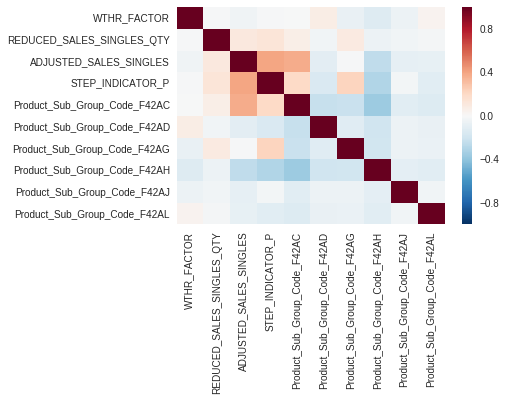

In [25]:
sns.heatmap( slSales_df2.corr() )

In [27]:
#Building a Simple Linear Regression model

A simple linear regression model is given by
Y=mX+b

where m is the slope and b is the y-intercept. Y is the dependent variable and X is the explanatory variable.

Very briefly and simplistically, Linear Regression is a class of techniques for fitting a straight line to a set of data points.

In [28]:
X_features = smf.add_constant( slSales_df.WTHR_FACTOR )
#X_features = slSales_df.WTHR_FACTOR

In [31]:
X_features.head(3)

,const,WTHR_FACTOR
0,1.0,1.010632
1,1.0,0.939946
2,1.0,1.015082


In [32]:
Y_sales = slSales_df.ADJUSTED_SALES_SINGLES

In [33]:
Y_sales.head(3)

0    19.15
1     2.00
2     3.00
Name: ADJUSTED_SALES_SINGLES, dtype: float64

In [34]:
lm = smf.OLS(Y_sales, X_features).fit()

In [35]:
lm.params

const          33.176047
WTHR_FACTOR   -23.413072
dtype: float64

In [39]:
lm.conf_int()

,0,1
const,27.395067,38.957026
WTHR_FACTOR,-29.152124,-17.674019


In [40]:
lm.summary()
#sales = 33.1760 -23.4131 * weather

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ADJUSTED_SALES_SINGLES   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                  0.002
Method:                     Least Squares   F-statistic:                     63.94
Date:                    Wed, 29 Nov 2017   Prob (F-statistic):           1.33e-15
Time:                            21:41:12   Log-Likelihood:            -1.2826e+05
No. Observations:                   30900   AIC:                         2.565e+05
Df Residuals:                       30898   BIC:                         2.565e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          33.1760      2.949     11.248      0.000      27.395      38.957
WTHR_FACTOR   -23.4131      2.928     -7.996      0.000     -29.152     -17.674
==============================================================================
Omnibus:                    21683.863   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           385639.508
Skew:                           3.213   Prob(JB):                         0.00
Kurtosis:                      19.070   Cond. No.                         67.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
lm.rsquared

0.0020650872497377515

In [42]:
lmpredict = lm.predict(X_features)

In [43]:
lmpredict[0:10]

0     9.514040
1    11.169026
2     9.409852
3    11.629249
4    10.957170
5    10.693390
6     9.762975
7    10.245879
8    10.245879
9     9.609482
dtype: float64

In [44]:
#X_features

# MULTI REGRESSION

In [45]:
#Multiple Linear Regression Model¶
slSales_df2.head(3)

,WTHR_FACTOR,REDUCED_SALES_SINGLES_QTY,ADJUSTED_SALES_SINGLES,STEP_INDICATOR_P,Product_Sub_Group_Code_F42AC,Product_Sub_Group_Code_F42AD,Product_Sub_Group_Code_F42AG,Product_Sub_Group_Code_F42AH,Product_Sub_Group_Code_F42AJ,Product_Sub_Group_Code_F42AL
0,1.010632,1,19.15,1,1,0,0,0,0,0
1,0.939946,0,2.00,0,0,1,0,0,0,0
2,1.015082,0,3.00,0,1,0,0,0,0,0


In [46]:
X = smf.add_constant( slSales_df2[['WTHR_FACTOR', 'REDUCED_SALES_SINGLES_QTY','STEP_INDICATOR_P',
'Product_Sub_Group_Code_F42AC','Product_Sub_Group_Code_F42AD','Product_Sub_Group_Code_F42AG',
'Product_Sub_Group_Code_F42AH','Product_Sub_Group_Code_F42AJ','Product_Sub_Group_Code_F42AL']],has_constant='skip' )

In [47]:
X.head(5)

,const,WTHR_FACTOR,REDUCED_SALES_SINGLES_QTY,STEP_INDICATOR_P,Product_Sub_Group_Code_F42AC,Product_Sub_Group_Code_F42AD,Product_Sub_Group_Code_F42AG,Product_Sub_Group_Code_F42AH,Product_Sub_Group_Code_F42AJ,Product_Sub_Group_Code_F42AL
0,1.0,1.010632,1,1,1,0,0,0,0,0
1,1.0,0.939946,0,0,0,1,0,0,0,0
2,1.0,1.015082,0,0,1,0,0,0,0,0
3,1.0,0.920289,0,1,0,0,0,0,0,0
4,1.0,0.948995,0,0,0,0,0,0,0,0


In [49]:
Y = slSales_df2.ADJUSTED_SALES_SINGLES

In [50]:
mlm = smf.OLS(Y,X).fit()

In [51]:
mlm.params

const                           39.270641
WTHR_FACTOR                    -32.563721
REDUCED_SALES_SINGLES_QTY        0.418300
STEP_INDICATOR_P                11.551698
Product_Sub_Group_Code_F42AC     7.274250
Product_Sub_Group_Code_F42AD    -1.905883
Product_Sub_Group_Code_F42AG    -4.051900
Product_Sub_Group_Code_F42AH    -4.206977
Product_Sub_Group_Code_F42AJ    -6.758212
Product_Sub_Group_Code_F42AL    -2.762279
dtype: float64

In [52]:
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ADJUSTED_SALES_SINGLES   R-squared:                       0.257
Model:                                OLS   Adj. R-squared:                  0.257
Method:                     Least Squares   F-statistic:                     1188.
Date:                    Wed, 29 Nov 2017   Prob (F-statistic):               0.00
Time:                            21:43:38   Log-Likelihood:            -1.2370e+05
No. Observations:                   30900   AIC:                         2.474e+05
Df Residuals:                       30890   BIC:                         2.475e+05
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           39.2706      2.641     14.867      0.000      34.093      44.448
WTHR_FACTOR                    -32.5637      2.589    -12.576      0.000     -37.639     -27.488
REDUCED_SALES_SINGLES_QTY        0.4183      0.046      9.143      0.000       0.329       0.508
STEP_INDICATOR_P                11.5517      0.199     58.008      0.000      11.161      11.942
Product_Sub_Group_Code_F42AC     7.2742      0.227     32.020      0.000       6.829       7.720
Product_Sub_Group_Code_F42AD    -1.9059      0.293     -6.495      0.000      -2.481      -1.331
Product_Sub_Group_Code_F42AG    -4.0519      0.301    -13.466      0.000      -4.642      -3.462
Product_Sub_Group_Code_F42AH    -4.2070      0.250    -16.820      0.000      -4.697      -3.717
Product_Sub_Group_Code_F42AJ    -6.7582      0.478    -14.149      0.000      -7.694      -5.822
Product_Sub_Group_Code_F42AL    -2.7623      0.424     -6.513      0.000      -3.594      -1.931
==============================================================================
Omnibus:                    21419.414   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           584621.510
Skew:                           2.982   Prob(JB):                         0.00
Kurtosis:                      23.457   Cond. No.                         88.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
lmpredict = mlm.predict(X)

In [55]:
#lmpredict
slSales_df2.to_csv("slSales_df2.csv",sep=',')

lmpredict.to_csv("lmpredict.csv",sep=',')


Calculating RMSE

    RMSE calculate the difference between the actual value and predicted value of the response variable
    The square root of the mean/average of the square of all of the error.
    Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors.
    The lesser the RMSE value, the better is the model.


In [56]:
rmse(Y, lmpredict)

13.255504696371085

In [58]:
Y.sort_values()

15888      0.00
6457       0.00
6456       0.00
13976      0.00
13978      0.00
27108      0.00
6447       0.00
21074      0.00
6442       0.00
6441       0.00
6440       0.00
27124      0.00
13975      0.00
6435       0.00
6428       0.00
13998      0.00
14003      0.00
14005      0.00
14007      0.00
14009      0.00
27139      0.00
27141      0.00
6411       0.00
21043      0.00
6407       0.00
21063      0.00
13974      0.00
6461       0.00
27094      0.00
21109      0.00
          ...  
10980    115.00
13252    116.00
15800    116.00
4532     117.15
30418    117.81
14825    118.00
569      119.00
2443     120.00
25700    120.00
386      120.00
9146     120.00
17931    121.00
17030    124.00
31341    125.30
23867    128.00
14871    130.00
12237    133.00
8131     135.00
26277    135.00
7909     136.30
7199     140.00
10119    140.00
17895    141.00
2687     147.00
12828    153.45
19014    167.00
597      179.00
30119    195.00
26586    226.06
24170    278.94
Name: ADJUSTED_SALES_SIN

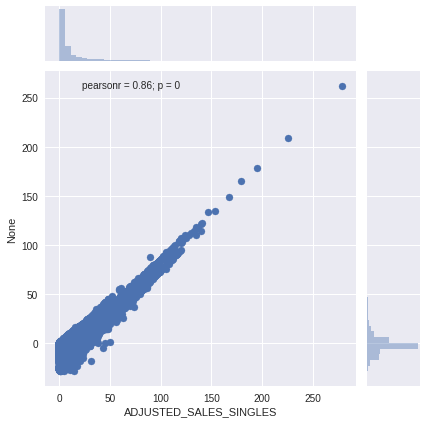

In [60]:
sns.jointplot(  slSales_df2.ADJUSTED_SALES_SINGLES, mlm.resid )

In [61]:
help(mlm.resid)

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.strings.StringAccessorMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  index : array-like or Index (1d)
 |      Values must be hashable and have the same lengt

In [62]:
help(smf.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  A simple ordinary least squares model.
 |  
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      1-d endogenous response variable. The dependent variable.
 |  exog : array-like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none.'
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result statistics are calculated as if a constant is present.

NOTE:he overall pattern of the residuals should be similar to the bell-shaped pattern observed 
    when plotting a histogram of normally distributed data. ... Departures from these assumptions
    usually mean that the residuals contain structure that is not accounted for in the model.

In [63]:
#Splitting into Train and Test data sets

In [64]:
#Typically the model should be built on a training dataset and validated against a test dataset

In [65]:
#Let's split the dataset into 70/30 ratio. 70% belongs to training and 30% belongs to test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
  slSales_df2[['WTHR_FACTOR', 'REDUCED_SALES_SINGLES_QTY','STEP_INDICATOR_P',
'Product_Sub_Group_Code_F42AC','Product_Sub_Group_Code_F42AD','Product_Sub_Group_Code_F42AG',
'Product_Sub_Group_Code_F42AH','Product_Sub_Group_Code_F42AJ','Product_Sub_Group_Code_F42AL']],
  slSales_df2.ADJUSTED_SALES_SINGLES,
  test_size=0.4,
  random_state = 42 )

In [67]:
len( X_train )

18540

In [68]:
len( X_test )

12360

In [69]:
#Build the model

In [70]:
X_train = smf.add_constant( X_train )
X_test = smf.add_constant( X_test )

In [71]:
lm = smf.OLS( y_train, X_train ).fit()

In [72]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ADJUSTED_SALES_SINGLES   R-squared:                       0.254
Model:                                OLS   Adj. R-squared:                  0.254
Method:                     Least Squares   F-statistic:                     702.0
Date:                    Wed, 29 Nov 2017   Prob (F-statistic):               0.00
Time:                            21:50:25   Log-Likelihood:                -74651.
No. Observations:                   18540   AIC:                         1.493e+05
Df Residuals:                       18530   BIC:                         1.494e+05
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           39.9582      3.577     11.171      0.000      32.947      46.969
WTHR_FACTOR                    -33.2092      3.505     -9.475      0.000     -40.079     -26.339
REDUCED_SALES_SINGLES_QTY        0.3598      0.059      6.123      0.000       0.245       0.475
STEP_INDICATOR_P                11.7684      0.263     44.752      0.000      11.253      12.284
Product_Sub_Group_Code_F42AC     7.4262      0.300     24.746      0.000       6.838       8.014
Product_Sub_Group_Code_F42AD    -1.9857      0.389     -5.099      0.000      -2.749      -1.222
Product_Sub_Group_Code_F42AG    -4.1987      0.397    -10.565      0.000      -4.978      -3.420
Product_Sub_Group_Code_F42AH    -4.1815      0.331    -12.650      0.000      -4.829      -3.534
Product_Sub_Group_Code_F42AJ    -6.6924      0.644    -10.397      0.000      -7.954      -5.431
Product_Sub_Group_Code_F42AL    -2.8501      0.565     -5.048      0.000      -3.957      -1.744
==============================================================================
Omnibus:                    13503.999   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           463165.143
Skew:                           3.122   Prob(JB):                         0.00
Kurtosis:                      26.677   Cond. No.                         93.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
y_predict = lm.predict( X_test )

In [74]:
rmse( y_predict, y_test )

12.779438631880728

In [75]:
residuals = y_test - y_predict

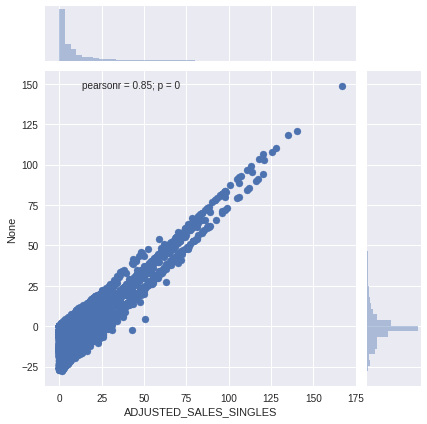

In [76]:
sns.jointplot(  y_test, residuals )

In [77]:
#TEST VALUES

In [78]:
sales_dftst = pd.read_csv( "DATA_EXL/test.csv",parse_dates=[2])

X_features = [
 'STEP_INDICATOR',
 'WTHR_FACTOR',
 'REDUCED_SALES_SINGLES_QTY',
 'Product_Sub_Group_Code',
  'ADJUSTED_SALES_SINGLES']



In [79]:
slSales_df3 = pd.get_dummies( sales_dftst[X_features], drop_first = True )

KeyError: "['STEP_INDICATOR' 'WTHR_FACTOR' 'REDUCED_SALES_SINGLES_QTY'\n 'Product_Sub_Group_Code' 'ADJUSTED_SALES_SINGLES'] not in index"

In [67]:
slSales_df3.head(10)

NameError: name 'slSales_df3' is not defined

In [68]:
TESTX = smf.add_constant( slSales_df3[['WTHR_FACTOR', 'REDUCED_SALES_SINGLES_QTY','STEP_INDICATOR_P',
'Product_Sub_Group_Code_F42AC','Product_Sub_Group_Code_F42AD','Product_Sub_Group_Code_F42AG',
'Product_Sub_Group_Code_F42AH','Product_Sub_Group_Code_F42AJ','Product_Sub_Group_Code_F42AL']],has_constant='skip' )

NameError: name 'slSales_df3' is not defined

In [ ]:
#TESTX
y_predict_TEST = lm.predict( TESTX )

In [ ]:
#some values look good rest dont
y_predict_TEST

In [ ]:
#RETAIL WITH TEST DATA SET test.csv

# RETAIL WITH TEST DATA SET test.csv

In [80]:
sales_df3 = pd.read_csv( "DATA_EXL/test.csv",parse_dates=[2])

In [81]:
sales_df3 = sales_df3[['DATE','DAY','SUBGRP','STEP','WEATHER','SALES']]

In [82]:
sales_df3.head(3)

,DATE,DAY,SUBGRP,STEP,WEATHER,SALES
0,09 October 2017,Mon,F112A,N,SS,14.08226
1,10 October 2017,Tue,F112A,N,SS,14.08226
2,11 October 2017,Wed,F112A,P,MS,15.32196


In [83]:
X_features = [
 'DATE',
 'DAY',
 'SUBGRP',
  'STEP',
'WEATHER']


In [84]:
X = pd.get_dummies( sales_df3[X_features], drop_first = False )

In [85]:
X.head(5)

,DATE_09 October 2017,DATE_10 October 2017,DATE_11 October 2017,DATE_12 October 2017,DATE_13 October 2017,DATE_14 October 2017,DATE_15 October 2017,DATE_16 October 2017,DATE_17 October 2017,DATE_18 October 2017,...,DAY_Wed,SUBGRP_F112A,STEP_N,STEP_P,WEATHER_C,WEATHER_MS,WEATHER_MW,WEATHER_S,WEATHER_SS,WEATHER_W
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [86]:
X.to_csv("slSales_df4.csv",sep=',')

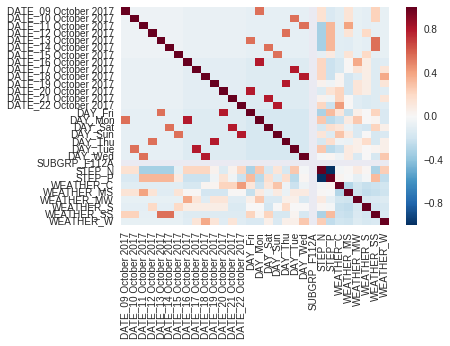

In [87]:
sns.heatmap( X.corr() )

In [88]:
Y= sales_df3.SALES

In [89]:
X_features = [
 'DATE',
 'SUBGRP',
  'STEP',
'WEATHER']
X = pd.get_dummies( sales_df3[X_features], drop_first = False )
#X.info()

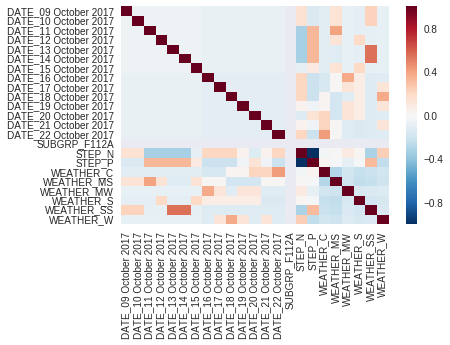

In [90]:
sns.heatmap( X.corr() )

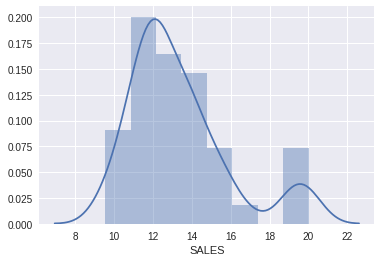

In [91]:
sns.distplot( Y )#SALES

In [92]:
list(X)

['DATE_09 October 2017',
 'DATE_10 October 2017',
 'DATE_11 October 2017',
 'DATE_12 October 2017',
 'DATE_13 October 2017',
 'DATE_14 October 2017',
 'DATE_15 October 2017',
 'DATE_16 October 2017',
 'DATE_17 October 2017',
 'DATE_18 October 2017',
 'DATE_19 October 2017',
 'DATE_20 October 2017',
 'DATE_21 October 2017',
 'DATE_22 October 2017',
 'SUBGRP_F112A',
 'STEP_N',
 'STEP_P',
 'WEATHER_C',
 'WEATHER_MS',
 'WEATHER_MW',
 'WEATHER_S',
 'WEATHER_SS',
 'WEATHER_W']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
  X[['DATE_09 October 2017',
 'DATE_10 October 2017',
 'DATE_11 October 2017',
 'DATE_12 October 2017',
 'DATE_13 October 2017',
 'DATE_14 October 2017',
 'DATE_15 October 2017',
 'DATE_16 October 2017',
 'DATE_17 October 2017',
 'DATE_18 October 2017',
 'DATE_19 October 2017',
 'DATE_20 October 2017',
 'DATE_21 October 2017',
 'DATE_22 October 2017',
 'SUBGRP_F112A',
 'STEP_N',
 'STEP_P',
 'WEATHER_C',
 'WEATHER_MS',
 'WEATHER_MW',
 'WEATHER_S',
 'WEATHER_SS',
 'WEATHER_W']],
  Y,
  test_size=0.4,
  random_state = 42 )

In [94]:
y_test

25    19.13313
13    10.67627
8     11.75562
26    20.00281
4     19.13313
39    12.97725
19    14.20875
29    12.38014
30    11.75562
6     16.60120
27    13.83808
12    13.49198
17    12.21611
9     11.75562
15    12.00053
33    10.96224
16    12.00053
Name: SALES, dtype: float64

In [95]:
X_test

,DATE_09 October 2017,DATE_10 October 2017,DATE_11 October 2017,DATE_12 October 2017,DATE_13 October 2017,DATE_14 October 2017,DATE_15 October 2017,DATE_16 October 2017,DATE_17 October 2017,DATE_18 October 2017,...,DATE_22 October 2017,SUBGRP_F112A,STEP_N,STEP_P,WEATHER_C,WEATHER_MS,WEATHER_MW,WEATHER_S,WEATHER_SS,WEATHER_W
25,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
13,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
26,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
39,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
29,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
30,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [96]:
X_train

,DATE_09 October 2017,DATE_10 October 2017,DATE_11 October 2017,DATE_12 October 2017,DATE_13 October 2017,DATE_14 October 2017,DATE_15 October 2017,DATE_16 October 2017,DATE_17 October 2017,DATE_18 October 2017,...,DATE_22 October 2017,SUBGRP_F112A,STEP_N,STEP_P,WEATHER_C,WEATHER_MS,WEATHER_MW,WEATHER_S,WEATHER_SS,WEATHER_W
36,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
35,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
24,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
11,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
31,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
21,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [97]:
y_train

36    11.143350
35    11.143350
0     14.082260
24    15.597200
5     20.002810
11    12.977250
40    13.567130
1     14.082260
31    11.966800
21    12.380140
2     15.321960
32    12.233220
41    10.676270
3     15.118950
37     9.551445
23    15.321960
34    10.676270
10    14.039030
22    12.380140
18    13.174240
20    13.838080
7     12.000530
14    11.143350
28    12.380140
38     9.723028
Name: SALES, dtype: float64

In [100]:
#check the ratio of promos in test n tain, this proves we do not have a biased sample
X_test['STEP_N'].value_counts()

1    12
0     5
Name: STEP_N, dtype: int64

In [101]:
X_train['STEP_N'].value_counts()

1    17
0     8
Name: STEP_N, dtype: int64

In [102]:
X_train = smf.add_constant( X_train,has_constant='add')

In [103]:
X_train.head(2)

,const,DATE_09 October 2017,DATE_10 October 2017,DATE_11 October 2017,DATE_12 October 2017,DATE_13 October 2017,DATE_14 October 2017,DATE_15 October 2017,DATE_16 October 2017,DATE_17 October 2017,...,DATE_22 October 2017,SUBGRP_F112A,STEP_N,STEP_P,WEATHER_C,WEATHER_MS,WEATHER_MW,WEATHER_S,WEATHER_SS,WEATHER_W
36,1.0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
35,1.0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0


In [104]:
X_test.head(2)

,DATE_09 October 2017,DATE_10 October 2017,DATE_11 October 2017,DATE_12 October 2017,DATE_13 October 2017,DATE_14 October 2017,DATE_15 October 2017,DATE_16 October 2017,DATE_17 October 2017,DATE_18 October 2017,...,DATE_22 October 2017,SUBGRP_F112A,STEP_N,STEP_P,WEATHER_C,WEATHER_MS,WEATHER_MW,WEATHER_S,WEATHER_SS,WEATHER_W
25,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
13,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0


In [105]:
X_test = smf.add_constant( X_test,has_constant='add' )
X_test.head(2)

,const,DATE_09 October 2017,DATE_10 October 2017,DATE_11 October 2017,DATE_12 October 2017,DATE_13 October 2017,DATE_14 October 2017,DATE_15 October 2017,DATE_16 October 2017,DATE_17 October 2017,...,DATE_22 October 2017,SUBGRP_F112A,STEP_N,STEP_P,WEATHER_C,WEATHER_MS,WEATHER_MW,WEATHER_S,WEATHER_SS,WEATHER_W
25,1.0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
13,1.0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0


In [106]:
mlm = smf.OLS(y_train, X_train ).fit()

R^2 = EXPLAINED /UNEXPLAINED  
A significant F-test indicates that the observed R-squared is reliable, and is not a spurious 
result of oddities in the data set. Thus, the F-test determines whether the proposed relationship
between the response variable and the set of predictors is statistically reliable, and can be useful
when the research objective is either prediction 
or explanation.( Assuming that everything is valid about your test, LARGE FSTAT simply indicates that your results are extremely statistically significant. )

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model
to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is 
a relative measure of fit, RMSE is an absolute measure of fit.

    ANlyse the residual- must be normal-independent and in variance

In [107]:
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6609.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):           4.66e-13
Time:                        21:56:41   Log-Likelihood:                 65.645
No. Observations:                  25   AIC:                            -95.29
Df Residuals:                       7   BIC:                            -73.35
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.0123      0.004   1201.066      0.000       5.002       5.022
DATE_09 October 2017    -0.3998      0.031    -12.750      0.000      -0.474      -0.326
DATE_10 October 2017    -0.3998      0.031    -12.750      0.000      -0.474      -0.326
DATE_11 October 2017     0.0244      0.034      0.724      0.492      -0.055       0.104
DATE_12 October 2017     0.2743      0.034      8.076      0.000       0.194       0.355
DATE_13 October 2017 -4.311e-16   1.91e-17    -22.514      0.000   -4.76e-16   -3.86e-16
DATE_14 October 2017     3.0031      0.048     62.314      0.000       2.889       3.117
DATE_15 October 2017  3.778e-16   1.91e-17     19.771      0.000    3.33e-16    4.23e-16
DATE_16 October 2017    -0.3523      0.024    -14.901      0.000      -0.408      -0.296
DATE_17 October 2017    -0.3288      0.040     -8.302      0.000      -0.422      -0.235
DATE_18 October 2017    -0.1001      0.039     -2.542      0.039      -0.193      -0.007
DATE_19 October 2017     0.0604      0.026      2.307      0.054      -0.002       0.122
DATE_20 October 2017     0.7970      0.022     35.536      0.000       0.744       0.850
DATE_21 October 2017     1.3980      0.040     34.988      0.000       1.304       1.493
DATE_22 October 2017     1.0359      0.026     39.924      0.000       0.975       1.097
SUBGRP_F112A             5.0123      0.004   1201.066      0.000       5.002       5.022
STEP_N                   1.2474      0.015     84.210      0.000       1.212       1.282
STEP_P                   3.7650      0.017    221.569      0.000       3.725       3.805
WEATHER_C               -1.6205      0.021    -77.797      0.000      -1.670      -1.571
WEATHER_MS               1.5080      0.018     82.895      0.000       1.465       1.551
WEATHER_MW               0.2001      0.020     10.122      0.000       0.153       0.247
WEATHER_S                1.0803      0.022     48.856      0.000       1.028       1.133
WEATHER_SS               3.2101      0.033     98.537      0.000       3.133       3.287
WEATHER_W                0.6344      0.038     16.638      0.000       0.544       0.725
==============================================================================
Omnibus:                        4.980   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.091
Skew:                          -0.766   Prob(JB):                        0.213
Kurtosis:                       3.788   Cond. No.                     4.49e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-34. This might indicate that there are
strong multicollinearity pr

In [108]:
y_predict = mlm.predict( X_test )

In [109]:
y_predict.head(10)

25    16.999700
13    10.687380
8     11.577607
26    20.002810
4     16.999700
39    12.966140
19    14.178013
29    12.451204
30    11.806327
6     14.869959
dtype: float64

In [110]:
y_test.head(10)

25    19.13313
13    10.67627
8     11.75562
26    20.00281
4     19.13313
39    12.97725
19    14.20875
29    12.38014
30    11.75562
6     16.60120
Name: SALES, dtype: float64

In [111]:
#model looks pretty accurate used for predicted vs actual ???
#The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to 
#the data–howclose the observed data points are to the model’s predicted values.
#this is sensitive to outliers
rmse( y_predict, y_test )

0.88810076314595232

In [112]:
residuals = y_test - y_predict

In [102]:
#sns.distplot(y_test,residuals )

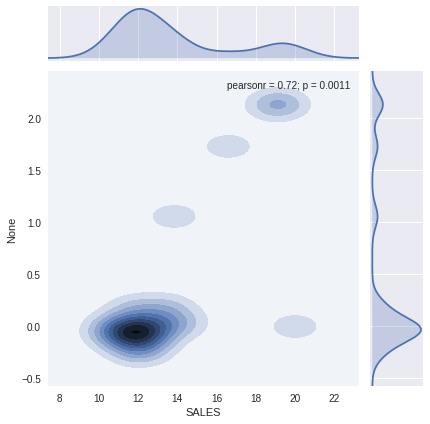

In [113]:
sns.jointplot(y_test, residuals , kind="kde");
#The residuals are not randomly distributed. The p-value for the correlation is less than 0.05.
#So, the correlation estimated is statistically significant.

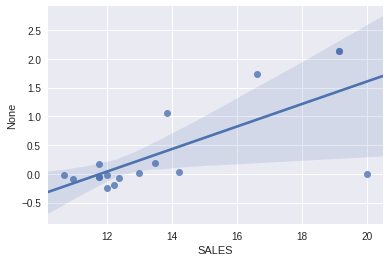

In [114]:
sns.regplot(y_test,residuals) #residuals plotted against actual y

In [115]:
#Q-Q Plot
import pylab
import scipy.stats as stats

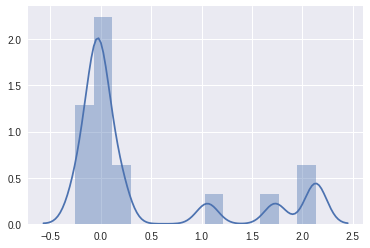

In [116]:
sns.distplot( residuals )

In [117]:
y_test-y_predict

25    2.133430e+00
13   -1.111014e-02
8     1.780133e-01
26    2.842171e-14
4     2.133430e+00
39    1.111014e-02
19    3.073725e-02
29   -7.106412e-02
30   -5.070714e-02
6     1.731241e+00
27    1.058097e+00
12    1.875647e-01
17   -1.966665e-01
9    -5.070714e-02
15   -2.305315e-02
33   -8.729318e-02
16   -2.517736e-01
dtype: float64

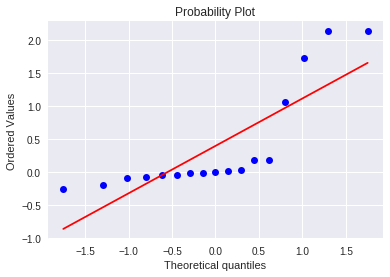

In [119]:
stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [120]:
residuals

25    2.133430e+00
13   -1.111014e-02
8     1.780133e-01
26    2.842171e-14
4     2.133430e+00
39    1.111014e-02
19    3.073725e-02
29   -7.106412e-02
30   -5.070714e-02
6     1.731241e+00
27    1.058097e+00
12    1.875647e-01
17   -1.966665e-01
9    -5.070714e-02
15   -2.305315e-02
33   -8.729318e-02
16   -2.517736e-01
dtype: float64

In [121]:
from scipy.stats import normaltest

In [122]:
normaltest( residuals )
#statistics is z score and p-value 2 sided chi-square test
#This function tests the null hypothesis that a sample comes from a normal distribution

#it is concluded that the residuals are not normally distributed

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=7.7214441902884445, pvalue=0.021052791914218404)

As the null hypothesis is the sample is derived from normal distribution and the p-value is less than 0.05,
it is concluded that the residuals are normally distributed.

To give an example: the critical Z score values when using a 95% confidence level are -1.96 and +1.96 
    standard deviations. If your Z score is between -1.96 and +1.96 you cannot reject your null hypothsis;
    the pattern exhibited is a pattern that could very likely be one version of a random pattern. 
    If the Z score falls outside that range(for example -2.5 or +5.4), the pattern exhibited is probably
    too unusual to be just another version of random chance. If this is the case, it is possible to reject 
    the null hypothesis and proceed with figuring out what might be causing either the statistically 
    significant clustered or statistically significant dispersed 
    pattern.

In [123]:
rmse(y_test,y_predict)

0.88810076314595232

In [124]:
help(rmse)

Help on function rmse in module statsmodels.tools.eval_measures:

rmse(x1, x2, axis=0)
    root mean squared error
    
    Parameters
    ----------
    x1, x2 : array_like
       The performance measure depends on the difference between these two
       arrays.
    axis : int
       axis along which the summary statistic is calculated
    
    Returns
    -------
    rmse : ndarray or float
       root mean squared error along given axis.
    
    Notes
    -----
    If ``x1`` and ``x2`` have different shapes, then they need to broadcast.
    This uses ``numpy.asanyarray`` to convert the input. Whether this is the
    desired result or not depends on the array subclass, for example
    numpy matrices will silently produce an incorrect result.

